# Week 11 Policy-based Reinforcement Learning
## Introduction
Reinforcement learning (RL) is a general framework where agents learn to perform actions in an environment so as to maximize a reward. The two main components are the environment, which represents the problem to be solved, and the agent, which represents the learning algorithm.

The agent and environment continuously interact with each other. At each time step, the agent takes an action on the environment based on its *policy* $\pi(a_t|s_t)$, where $s_t$ is the current observation from the environment, and receives a reward $r_{t+1}$ and the next observation $s_{t+1}$ from the environment. The goal is to improve the policy so as to maximize the sum of rewards (return).

In reinforcement learning, we create an agent which performs actions in an environment and the agent receives various rewards depending on what state it is in when it performs the action. In other words, an agent explores a kind of game, and it is trained by trying to maximize rewards in this game. This cycle is illustrated in the figure below:

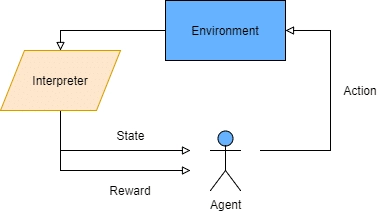

As can be observed above, the agent performs some action in the environment. An interpreter views this action in the environment, and feeds back an updated state that the agent now resides in, and also the reward for taking this action. The environment is not known by the agent beforehand, but rather it is discovered by the agent taking incremental steps in time. So, for instance, at time t the agent, in state $s_{t}$,  may take action a. This results in a new state $s_{t+1}$ and a reward r. This reward can be a positive real number, zero, or a negative real number. It is the goal of the agent to learn which state dependent action to take which maximizes its rewards. The way which the agent optimally learns is the subject of reinforcement learning theory and methodologies.

Terminologies:

1. State, action, and agent
2. Policy function $\pi(a_t|s_t)$ is a probability distribution function (PDF)
3. Reward R
4. State transition $p(s_1|s_0,a)$: old state via action transfer to a new state
5. Agent environment interaction
6. Randomness in RL: Actions have randomness and state transitions have randomness (new state can be random)
7. Return: cumulative future reward 
8. Discounted return: cumulative discounted future reward (future reward is less valuable than present reward)
9. Discount rate: $\gamma$) (is a tuning hyper-parameter)
10. Action-value function: $Q(s,a)$ for policy $\pi(a|s)$ is a expectation, which evaluates how good it is for an agent to pick action $a$, while being in state $s$ for policy $\pi$.
11. Optimal action-value function: $Q^*(s, a)$
12. State-value function: $V(s)$ for policy $\pi(a|s)$, which evaluates how good the situation is in state s.



In this tutorial, We aim to help you take your first steps into the world of reinforcement learning. We’ll use one of the most popular algorithms in RL, Q-learning, to understand how RL works.

# How does RL control the agent to play game?
1. Strategy 1: Value-based learning that supppose we know the optimal action-value function Q*(s, a). Upon observe the state $s_t$, choose the action that maximizes the value: $a_t$ = argmax $_a$ Q*($s_t$,a)

2. Strategy 2: Policy-based learning that suppose we have a good policy $\pi(a|s)$. Upon observe the state $s_t$,random sampling: $a_t - \pi(*|s_t)$

# RL Agent-Environment
A reinforcement learning task is about training an agent which interacts with its environment. The agent arrives at different scenarios known as states by performing actions. Actions lead to rewards which could be positive and negative.

The agent has only one purpose here – to maximize its total reward across an episode. This episode is anything and everything that happens between the first state and the last or terminal state within the environment. We reinforce the agent to learn to perform the best actions by experience. This is the strategy or policy.

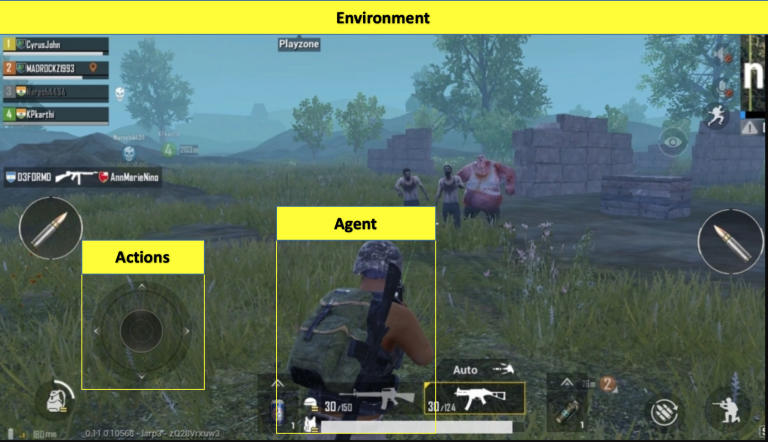

Let’s take an example of the ultra-popular PubG game:

The soldier is the agent here interacting with the environment

The states are exactly what we see on the screen

An episode is a complete game

The actions are moving forward, backward, left, right, jump, duck, shoot, etc.

Rewards are defined on the basis of the outcome of these actions. If the soldier is able to kill an enemy, that calls for a positive reward while getting shot by an enemy is a negative reward

Now, in order to kill that enemy or get a positive reward, there is a sequence of actions required. This is where the concept of delayed or postponed reward comes into play. The crux of RL is learning to perform these sequences and maximizing the reward.

## The environment  from OpenAI Gym

### Gym is a toolkit for developing and comparing RL algorithms (https://gym.openai.com/)

#### Classical control problems:
1. [Cart Pole](https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/CartPole-v1/original.mp4)
2. [Pendulum](https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/Pendulum-v0/original.mp4)
3. [Atari Games(Pong, Space Invader, Breakout](https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/SpaceInvaders-v0/original.mp4)
4. [MuJoCo (Continuous control tasks): Ant, Humanoid, Half Cheetah](https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/Ant-v2/original.mp4)

You can play around with this environment by first installing the Open AI Gym Python package 

In [3]:
# first we have to install the gym module, which contains the CartPole environment
#If you not install this module yet, running the following command
#!pip install gym

In [1]:
#A random agent to play the CartPole Game
#load the pytho module gym
import gym
#Get the environment of CartPole from Gym
env = gym.make("CartPole-v1")
state = env.reset() #Resets the environment and returns a random initial state.
for _ in range(1000):
    env.render() #A window pops up rendering CartPole
    action = env.action_space.sample() # your agent here (this takes random actions)
    state, reward, done, info = env.step(action) #Step the environment by one timestep. Returns
    #info: Additional info such as performance and latency for debugging purposes
    if done: #done = 1 means finished (win or lose the game)
        state = env.reset()
env.close()
#env provides states and reward

In [1]:
#A random agent to play the Pendulum Game
#Get the environment of Pendulum from Gym
env = gym.make('Pendulum-v0')
state = env.reset() #observation
for _ in range(1000):
    env.render() #A window pops up rendering CartPole. Renders one frame of the environment (helpful in visualizing the environment)
    action = env.action_space.sample() # your agent here (this takes random actions)
    state, reward, done, info = env.step(action) 

    if done: #done = 1 means finished (win or lose the game)
        state = env.reset()
env.close()
#env provides states and reward

NameError: name 'gym' is not defined

In [3]:
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D

class PGAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = 0.99
        self.learning_rate = 0.001
        self.states = []
        self.gradients = []
        self.rewards = []
        self.probs = []
        self.model = self._build_model()
        self.model.summary()

    def _build_model(self):
        model = Sequential()
        model.add(Reshape((1, 80, 80), input_shape=(self.state_size,)))
        model.add(Convolution2D(32, 6, 6, subsample=(3, 3), border_mode='same',
                                activation='relu', init='he_uniform'))
        model.add(Flatten())
        model.add(Dense(64, activation='relu', init='he_uniform'))
        model.add(Dense(32, activation='relu', init='he_uniform'))
        model.add(Dense(self.action_size, activation='softmax'))
        opt = Adam(lr=self.learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=opt)
        return model

    def memorize(self, state, action, prob, reward):
        y = np.zeros([self.action_size])
        y[action] = 1
        self.gradients.append(np.array(y).astype('float32') - prob)
        self.states.append(state)
        self.rewards.append(reward)

    def act(self, state):
        state = state.reshape([1, state.shape[0]])
        aprob = self.model.predict(state, batch_size=1).flatten()
        self.probs.append(aprob)
        prob = aprob / np.sum(aprob)
        action = np.random.choice(self.action_size, 1, p=prob)[0]
        return action, prob

    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, rewards.size)):
            if rewards[t] != 0:
                running_add = 0
            running_add = running_add * self.gamma + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    def train(self):
        gradients = np.vstack(self.gradients)
        rewards = np.vstack(self.rewards)
        rewards = self.discount_rewards(rewards)
        rewards = (rewards - np.mean(rewards)) / (np.std(rewards) + 1e-7)
        gradients *= rewards
        X = np.squeeze(np.vstack([self.states]))
        Y = self.probs + self.learning_rate * np.squeeze(np.vstack([gradients]))
        self.model.train_on_batch(X, Y)
        self.states, self.probs, self.gradients, self.rewards = [], [], [], []

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)
        
def preprocess(I):
    I = I[35:195]
    I = I[::2, ::2, 0]
    I[I == 144] = 0
    I[I == 109] = 0
    I[I != 0] = 1
    return I.astype(np.float).ravel()



ModuleNotFoundError: No module named 'gym'

In [4]:
if __name__ == "__main__":
    env = gym.make("Pong-v0")
    state = env.reset()
    prev_x = None
    score = 0
    episode = 0

    state_size = 80 * 80
    action_size = env.action_space.n
    agent = PGAgent(state_size, action_size)
    agent.load('pong.h5')
    while True:
        env.render()

        cur_x = preprocess(state)
        x = cur_x - prev_x if prev_x is not None else np.zeros(state_size)
        prev_x = cur_x

        action, prob = agent.act(x)
        state, reward, done, info = env.step(action)
        score += reward
        agent.memorize(x, action, prob, reward)

        if done:
            episode += 1
            agent.train()
            print('Episode: %d - Score: %f.' % (episode, score))
            score = 0
            state = env.reset()
            prev_x = None
            if episode > 1 and episode % 10 == 0:
                agent.save('pong.h5')

NameError: name 'gym' is not defined